In [7]:

import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd

In [8]:
dataset_train=pd.read_csv("C:/Users/User/Downloads/google.csv")

In [10]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [11]:
training_set = dataset_train.iloc[:, 1:2].values

## feature scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN 

In [15]:
import tensorflow as tf
import pyforest
from pyforest import *
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [16]:
regressor=Sequential()

## Adding the first LSTM layer

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

W0912 21:01:54.490207 12648 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0912 21:01:55.263524 12648 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0912 21:01:58.649996 12648 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0912 21:01:58.654990 12648 deprecation.py:506] From C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be 

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

## output layer

In [21]:
regressor.add(Dense(units = 1))

In [22]:
## compling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

W0912 21:02:07.809862 12648 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [23]:
dataset_test=pd.read_csv("C:/Users/User/Downloads/google_test.csv")

In [24]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [25]:
dataset_test.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [27]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

W0912 21:02:35.903095 12648 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\keras\backend\tensorflow_backend.py:3005: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



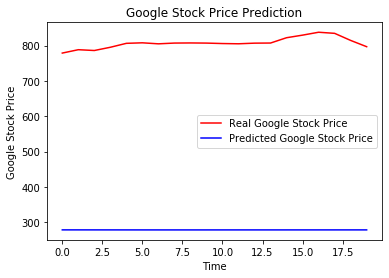

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()